In [1]:
import pandas as pd

## 数据信息

In [2]:
air_data=pd.read_csv('./data/air_data.csv')
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MEMBER_NO                62988 non-null  int64  
 1   FFP_DATE                 62988 non-null  object 
 2   FIRST_FLIGHT_DATE        62988 non-null  object 
 3   GENDER                   62985 non-null  object 
 4   FFP_TIER                 62988 non-null  int64  
 5   WORK_CITY                60719 non-null  object 
 6   WORK_PROVINCE            59740 non-null  object 
 7   WORK_COUNTRY             62962 non-null  object 
 8   AGE                      62568 non-null  float64
 9   LOAD_TIME                62988 non-null  object 
 10  FLIGHT_COUNT             62988 non-null  int64  
 11  BP_SUM                   62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1              

In [3]:
data1=air_data.isnull().sum()
data2=air_data.describe().T[['max','min']]

In [4]:
data=pd.concat([data1,data2],axis=1)
data.columns=['缺失值','最大值','最小值']
data

,缺失值,最大值,最小值
MEMBER_NO,0,62988.000000,1.00
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6.000000,4.00
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420,110.000000,6.00
LOAD_TIME,0,NaN,NaN


In [5]:
# data.to_excel('./explore.xlsx')

## 数据清洗

In [6]:
air_data=air_data.loc[air_data['SUM_YR_1'].notnull() & air_data['SUM_YR_2'].notnull()].query('SUM_YR_1!=0 | SUM_YR_2!=0')
air_data=air_data.loc[(air_data['SEG_KM_SUM']!=0) & (air_data['avg_discount']!=0)]
air_data

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005/05/08,2005/08/26,男,4,NaN,NaN,CN,34.0,2014/03/31,...,500,500,500,900,900,1.000000,0.000000,0.000000,0.997506,1
62975,30765,2008/11/16,2013/11/30,男,4,TAIPEI,NaN,TW,38.0,2014/03/31,...,0,0,0,400,400,1.000000,0.000000,0.000000,0.997506,0
62976,10380,2010/07/08,2011/06/21,男,4,贵阳市,贵州省,CN,33.0,2014/03/31,...,0,0,0,213,0,0.500000,0.500000,0.995327,0.000000,1
62977,16372,2012/12/20,2012/12/20,男,4,桃园,NaN,TW,47.0,2014/03/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


In [7]:
# air_data.to_excel('./data_cleaned.xlsx',index=False)

## 属性规约

In [8]:
from datetime import datetime
air_data['FFP_DATE']=pd.to_datetime(air_data['FFP_DATE'])
air_data['LOAD_TIME']=pd.to_datetime(air_data['LOAD_TIME'])
useful_data=air_data.loc[:,['FFP_DATE','LOAD_TIME','FLIGHT_COUNT','avg_discount','SEG_KM_SUM','LAST_TO_END']]
useful_data

,FFP_DATE,LOAD_TIME,FLIGHT_COUNT,avg_discount,SEG_KM_SUM,LAST_TO_END
0,2006-11-02,2014-03-31,210,0.961639,580717,1
1,2007-02-19,2014-03-31,140,1.252314,293678,7
2,2007-02-01,2014-03-31,135,1.254676,283712,11
3,2008-08-22,2014-03-31,23,1.090870,281336,97
4,2009-04-10,2014-03-31,152,0.970658,309928,5
...,...,...,...,...,...,...
62974,2005-05-08,2014-03-31,2,0.710000,368,89
62975,2008-11-16,2014-03-31,2,0.670000,368,121
62976,2010-07-08,2014-03-31,2,0.225000,1062,39
62977,2012-12-20,2014-03-31,2,0.250000,904,464


In [9]:
useful_data['L']=(useful_data['LOAD_TIME']-useful_data['FFP_DATE'])/30
useful_data['R']=useful_data['LAST_TO_END']/30
useful_data['F']=useful_data['FLIGHT_COUNT']
useful_data['M']=useful_data['SEG_KM_SUM']
useful_data['C']=useful_data['avg_discount']
useful_data=useful_data[['L','R','F','M','C']]
useful_data

,L,R,F,M,C
0,90 days 04:48:00,0.033333,210,580717,0.961639
1,86 days 13:36:00,0.233333,140,293678,1.252314
2,87 days 04:00:00,0.366667,135,283712,1.254676
3,68 days 05:36:00,3.233333,23,281336,1.090870
4,60 days 12:48:00,0.166667,152,309928,0.970658
...,...,...,...,...,...
62974,108 days 07:12:00,2.966667,2,368,0.710000
62975,65 days 08:48:00,4.033333,2,368,0.670000
62976,45 days 09:36:00,1.300000,2,1062,0.225000
62977,15 days 12:48:00,15.466667,2,904,0.250000


## 标准化处理

In [10]:
useful_data_std=(useful_data-useful_data.mean(axis=0))/useful_data.std(axis=0)
useful_data_std

,L,R,F,M,C
0,1.435707,-0.944948,14.034016,26.761154,1.29554
1,1.307152,-0.911894,9.073213,13.126864,2.868176
2,1.328381,-0.889859,8.718869,12.653481,2.88095
3,0.658476,-0.416098,0.781585,12.540622,1.994714
4,0.386032,-0.922912,9.923636,13.898736,1.344335
...,...,...,...,...,...
62974,2.076128,-0.460169,-0.706656,-0.805297,-0.065898
62975,0.557046,-0.283886,-0.706656,-0.805297,-0.282309
62976,-0.149421,-0.735611,-0.706656,-0.772332,-2.689885
62977,-1.206173,1.605649,-0.706656,-0.779837,-2.554628


In [11]:
useful_data_std.columns=['ZL','ZR','ZF','ZM','ZC']
# agreement_std.to_excel('./data_std.xlsx', index=False)

## 聚类

In [12]:
from sklearn.cluster import KMeans

In [13]:
k=5 # 类别数
k_model=KMeans(n_clusters=k)
k_model.fit(useful_data_std)

KMeans(n_clusters=5)

In [14]:
r1=pd.Series(k_model.labels_).value_counts()
r1

0    24645
4    15735
3    12127
1     5337
2     4200
dtype: int64

In [15]:
r2=pd.DataFrame(k_model.cluster_centers_)
r2

,0,1,2,3,4
0,-0.700223,-0.415219,-0.160833,-0.160680,-0.255373
1,0.483363,-0.799424,2.483082,2.424109,0.309486
2,0.049795,-0.001434,-0.229482,-0.233696,2.185832
3,-0.313543,1.685867,-0.573904,-0.536662,-0.174750
4,1.160941,-0.377308,-0.086919,-0.094720,-0.156377


In [16]:
cluster=pd.concat([r1,r2],axis=1)
cluster.columns=['聚类个数','ZL','ZR','ZF','ZM','ZC']
cluster

,聚类个数,ZL,ZR,ZF,ZM,ZC
0,24645,-0.700223,-0.415219,-0.160833,-0.160680,-0.255373
4,15735,1.160941,-0.377308,-0.086919,-0.094720,-0.156377
3,12127,-0.313543,1.685867,-0.573904,-0.536662,-0.174750
1,5337,0.483363,-0.799424,2.483082,2.424109,0.309486
2,4200,0.049795,-0.001434,-0.229482,-0.233696,2.185832


In [17]:
# cluster.to_excel('./KMeans_cluster.xlsx',index=False)

In [19]:
data_detail=pd.concat([useful_data_std,pd.Series(k_model.labels_,index=useful_data_std.index)], axis=1)
data_detail.columns=['ZL','ZR','ZF','ZM','ZC','客户类别']
data_detail

,ZL,ZR,ZF,ZM,ZC,客户类别
0,1.435707,-0.944948,14.034016,26.761154,1.29554,1
1,1.307152,-0.911894,9.073213,13.126864,2.868176,1
2,1.328381,-0.889859,8.718869,12.653481,2.88095,1
3,0.658476,-0.416098,0.781585,12.540622,1.994714,1
4,0.386032,-0.922912,9.923636,13.898736,1.344335,1
...,...,...,...,...,...,...
62974,2.076128,-0.460169,-0.706656,-0.805297,-0.065898,4
62975,0.557046,-0.283886,-0.706656,-0.805297,-0.282309,4
62976,-0.149421,-0.735611,-0.706656,-0.772332,-2.689885,0
62977,-1.206173,1.605649,-0.706656,-0.779837,-2.554628,3


## 数据可视化

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
# 负号乱码
plt.rcParams['axes.unicode_minus']=False

In [22]:
d1=cluster.round(2).iloc[[0],[1,2,3,4,5]]
d2=cluster.round(2).iloc[[1],[1,2,3,4,5]]
d3=cluster.round(2).iloc[[2],[1,2,3,4,5]]
d4=cluster.round(2).iloc[[3],[1,2,3,4,5]]
d5=cluster.round(2).iloc[[4],[1,2,3,4,5]]
d1=np.array(d1.values[0])
d2=np.array(d2.values[0])
d3=np.array(d3.values[0])
d4=np.array(d4.values[0])
d5=np.array(d5.values[0])

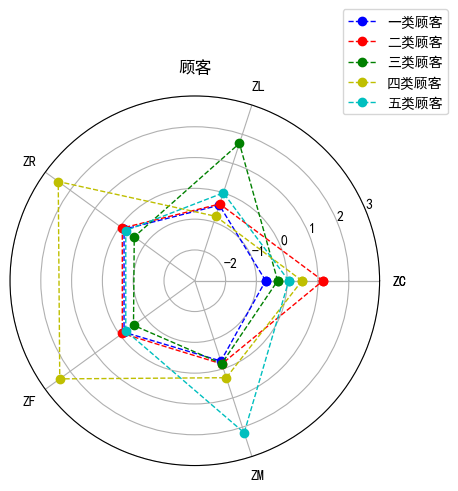

In [23]:
label=cluster.columns
length=5
# 设置5个维度标签的位置
angles=np.linspace(0,np.pi*2,length,endpoint=False)
# 生成闭合曲线
l1=np.concatenate((d1,[d1[0]]))
l2=np.concatenate((d2,[d2[0]]))
l3=np.concatenate((d3,[d3[0]]))
l4=np.concatenate((d4,[d4[0]]))
l5=np.concatenate((d5,[d5[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax=fig.add_subplot(111,polar=True)
ax.plot(angles,l1,'bo--',linewidth=1,label='一类顾客')
ax.plot(angles,l2,'ro--',linewidth=1,label='二类顾客')
ax.plot(angles,l3,'go--',linewidth=1,label='三类顾客')
ax.plot(angles,l4,'yo--',linewidth=1,label='四类顾客')
ax.plot(angles,l5,'co--',linewidth=1,label='五类顾客')
# 生成标签角度
ax.set_thetagrids(angles*180/np.pi,label,)
ax.set_title('顾客')
ax.set_rlim(-3,3)
plt.grid(True)
# 设置图例位置
plt.legend( loc=(0.9, .95),labelspacing=0.5)
plt.show()